In [2]:
import os
import pandas as pd
import gensim
from gensim.corpora import Dictionary
from gensim.models.wrappers import LdaMallet
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim as gensimvis
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



# preprocess a single tweet/text
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    stop_words.add("embeddedurl")
    tokens = [word for word in tokens if word not in stop_words]
    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return tokens

# evaluate the coherence for each number of topics in a range
def evaluate_coherence(corpus, dictionary, texts, num_topics_list):
    coherence_scores = []
    lda_models = []  # List to store LDA models

    for num_topics in num_topics_list:
        print(num_topics)
        # Create a new LDA model for each evaluation
        lda_model = LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dictionary)
        coherence = CoherenceModel(model=lda_model, texts=texts, corpus=corpus, dictionary=dictionary, coherence='c_v')
        coherence_scores.append((num_topics, coherence.get_coherence()))
        lda_models.append(lda_model)

    # Create a DataFrame to store the coherence scores
    coherence_df = pd.DataFrame(coherence_scores, columns=["Number of Topics", "Coherence Scores"])
    return coherence_df, lda_models


# # load the data and transform to DataFrame
# df = pd.read_csv(".././data/full_year.csv")
# df = df[df['spirituality'] == True][['clean_text']]
# df['tokenized_text'] = df['clean_text'].apply(preprocess_text)

# # load the data and transform to DataFrame
df = pd.read_csv(".././data/full_year.csv")
# Filter tweets containing "spirituality" but not "religion"
df = df[df['clean_text'].str.contains('spirituality', case=False) & ~df['clean_text'].str.contains('religion', case=False)]
df['tokenized_text'] = df['clean_text'].apply(preprocess_text)


# create vocabulary and doc2box doc-term matrix
dictionary = Dictionary(df['tokenized_text'])
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df['tokenized_text']]

# path to the Mallet executable
mallet_path = 'mallet-2.0.8/bin/mallet'

# run and save the model
num_topics = 10 
lda = LdaMallet(mallet_path, corpus=doc_term_matrix, num_topics=num_topics, id2word=dictionary)
os.makedirs('models', exist_ok=True)
lda.save(os.path.join('models', 'lda_spirituality'))

# calculate coherence and save to csv
num_topics_list = list(range(2, 16, 1))
coherence_scores, lda_models = evaluate_coherence(doc_term_matrix, dictionary, df['tokenized_text'], num_topics_list)

# save all the LDA models
for i, model in enumerate(lda_models):
    model.save(os.path.join('models', f'lda_spirituality_{num_topics_list[i]}_topics'))

os.makedirs('coherence', exist_ok=True)
coherence_scores.to_csv(os.path.join('coherence', 'coherence_spirituality.csv'), index=False)

[nltk_data] Downloading package punkt to /Users/shtosti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shtosti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/shtosti/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Mallet LDA: 10 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 61
total tokens: 1366629
<10> LL/token: -10.40179
<20> LL/token: -10.08301
<30> LL/token: -9.70078
<40> LL/token: -9.43242

0	5	spirituality love peace healing quote world motivation inspiration wisdom enlightenment follow life living awareness spiritual blessing positive knowledge growth dharma 
1	5	spirituality hard sagittarius labeling se book people science hope connection universe family evolution person based step author modern read truth 
2	5	spirituality life spiritual love work experience real consciousness success free

2


Mallet LDA: 2 topics, 1 topic bits, 1 topic mask
Data loaded.
max tokens: 61
total tokens: 1366629
<10> LL/token: -9.10575
<20> LL/token: -9.04778
<30> LL/token: -8.98746
<40> LL/token: -8.92303

0	25	spirituality love book life spiritual people hard sagittarius se labeling god healing thing faith read peace science rt gt quote 
1	25	spirituality spiritual meditation life god love yoga inspiration wisdom mindfulness people world happiness ji soul true day make saint time 

<50> LL/token: -8.86535
<60> LL/token: -8.81494
<70> LL/token: -8.77564
<80> LL/token: -8.743
<90> LL/token: -8.71701

0	25	spirituality book people love hard sagittarius se labeling healing science thing rt work read time energy life experience good gt 
1	25	spirituality spiritual meditation god life love world inspiration wisdom yoga mindfulness soul day make peace happiness ji true consciousness mind 

<100> LL/token: -8.69441
<110> LL/token: -8.67657
<120> LL/token: -8.66304
<130> LL/token: -8.65021
<140> LL/toke

3


Mallet LDA: 3 topics, 2 topic bits, 11 topic mask
Data loaded.
max tokens: 61
total tokens: 1366629
<10> LL/token: -9.44893
<20> LL/token: -9.35122
<30> LL/token: -9.23865
<40> LL/token: -9.11764

0	16.66667	spirituality life people book god spiritual ji work science true path saint experience good day humanity love soul universe real 
1	16.66667	spirituality spiritual meditation hard sagittarius se love labeling yoga god mindfulness wisdom happiness inspiration faith video gt heart alratv life 
2	16.66667	spirituality love life healing world peace time motivation quote enlightenment meditation tarot energy reading astrology health spiritual inspiration awareness living 

<50> LL/token: -9.02024
<60> LL/token: -8.94586
<70> LL/token: -8.88933
<80> LL/token: -8.84294
<90> LL/token: -8.80651

0	16.66667	spirituality people life book science ji work day true good path experience thing make saint african humanity universe person real 
1	16.66667	spirituality spiritual meditation love god h

4


Mallet LDA: 4 topics, 2 topic bits, 11 topic mask
Data loaded.
max tokens: 61
total tokens: 1366629
<10> LL/token: -9.68757
<20> LL/token: -9.55041
<30> LL/token: -9.39975
<40> LL/token: -9.25395

0	12.5	spirituality life gt experience work meditation real people india book culture success tarot health astrology spiritual join art freedom time 
1	12.5	spirituality hard labeling se sagittarius world life people motivation quote time healing living make thing awareness enlightenment inspiration blessing rt 
2	12.5	spirituality meditation book mindfulness yoga spiritual ji happiness wisdom inspiration life read saint people path science video humanity day mooji 
3	12.5	spirituality love spiritual god peace faith meditation heart soul life spiritualawakening awakening divine truth alratv knowledge younusalgohar sufism true goharshahi 

<50> LL/token: -9.1223
<60> LL/token: -9.02708
<70> LL/token: -8.95571
<80> LL/token: -8.90068
<90> LL/token: -8.85974

0	12.5	spirituality life work experi

5


Mallet LDA: 5 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 61
total tokens: 1366629
<10> LL/token: -9.86937
<20> LL/token: -9.68512
<30> LL/token: -9.47955
<40> LL/token: -9.28977

0	10	spirituality love healing world peace quote motivation life enlightenment find inspiration living awareness wisdom health today day happy blessing positive 
1	10	spirituality meditation yoga mindfulness spiritual happiness wisdom inspiration life video spiritualawakening mooji inspirational mind consciousness vedanta ji advaita people woman 
2	10	spirituality book life spiritual people science work true experience path saint ji read universe real human religious follow connection hope 
3	10	spirituality tarot reading astrology thing people time psychic year african black spirit life podcast money feel place church child horoscope 
4	10	spirituality god love spiritual hard sagittarius se labeling faith heart soul gt divine alratv younusalgohar sufism awakening goharshahi jesus watch 

<5

6


Mallet LDA: 6 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 61
total tokens: 1366629
<10> LL/token: -10.01778
<20> LL/token: -9.83255
<30> LL/token: -9.61741
<40> LL/token: -9.39486

0	8.33333	spirituality gt faith life time follow art true thing people understand spiritual feel knowledge mind learning business start gratitude day 
1	8.33333	spirituality meditation love spiritual inspiration wisdom yoga mindfulness healing peace happiness quote motivation world enlightenment tarot video living mooji awareness 
2	8.33333	spirituality book find people free connection science universe life read world hope love human story christianity journey crystal evolution man 
3	8.33333	spirituality life spiritual work people experience ji real success saint thing year guide path guru freedom practice african maharaj gurmeetramrahim 
4	8.33333	spirituality god hard labeling sagittarius se spiritual love heart youtube divine alratv younusalgohar sufism goharshahi awakening soul watch f

7


Mallet LDA: 7 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 61
total tokens: 1366629
<10> LL/token: -10.13269
<20> LL/token: -9.88449
<30> LL/token: -9.59761
<40> LL/token: -9.34863

0	7.14286	spirituality world love quote motivation healing gt book peace enlightenment inspiration living awareness science blessing hope positive connection dharma people 
1	7.14286	spirituality hard sagittarius se labeling people year thing time today african child good life prayer rt make join family energy 
2	7.14286	spirituality people thing time talk african science life kindle feel podcast woman rt relationship feeling lot amazon age thought practice 
3	7.14286	spirituality god love spiritual faith heart soul divine alratv knowledge awakening younusalgohar sufism goharshahi truth follow jesus peace watch spirit 
4	7.14286	spirituality read book tarot astrology youtube free reading human find link crystal culture religious online channel horoscope end sign psychic 
5	7.14286	spiritual

8


Mallet LDA: 8 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 61
total tokens: 1366629
<10> LL/token: -10.23596
<20> LL/token: -9.95179
<30> LL/token: -9.63739
<40> LL/token: -9.39262

0	6.25	spirituality hard sagittarius se labeling people book science universe hope connection path evolution step good kindle rt author time amazon 
1	6.25	spirituality culture time music maharaj thing society today month day community question lesson sant life join people ji live true 
2	6.25	spirituality meditation spiritual yoga mindfulness happiness wisdom inspiration video art life mooji inspirational consciousness vedanta nature advaita energy mind alanwatts 
3	6.25	spirituality india woman make relationship religious man world person great based human family people medium rt indian thing american today 
4	6.25	spirituality ji day true gt saint humanity follow guru knowledge understand gurmeetramrahim people spiritualsunday million business singh show gratitude start 
5	6.25	spiritual

9


Mallet LDA: 9 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 61
total tokens: 1366629
<10> LL/token: -10.32919
<20> LL/token: -10.02456
<30> LL/token: -9.68076
<40> LL/token: -9.41086

0	5.55556	god love spirituality spiritual soul heart faith youtube awakening divine peace alratv younusalgohar sufism spiritualawakening goharshahi link jesus truth full 
1	5.55556	spirituality mind meditate people listen sound hour join thing practice episode calm time meditation podcast church feel consciousness nature rt 
2	5.55556	spirituality meditation yoga spiritual mindfulness happiness wisdom world inspiration video india human mooji inspirational culture vedanta advaita person alanwatts rupertspira 
3	5.55556	spirituality hard sagittarius labeling se people science find universe connection hope music medium evolution step time miracle modern guided free 
4	5.55556	spirituality people make thing health learning african rt life time practice religious hindu indian process black ma

10


Mallet LDA: 10 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 61
total tokens: 1366629
<10> LL/token: -10.40498
<20> LL/token: -10.07826
<30> LL/token: -9.70305
<40> LL/token: -9.41626

0	5	spirituality book science tarot reading astrology energy love universe hope connection people psychic learning medium evolution sign step manifestation horoscope 
1	5	spirituality hard sagittarius se labeling life work experience spiritual real success freedom guide book child lifestyle love lesson year writingcommunity 
2	5	spirituality good change thing christianity african woman time kindle people rt talk thought art amazon black men balance buddha chakra 
3	5	spirituality day saint ji make humanity people great gurmeetramrahim church life million world india spiritualsunday singh path indian community insan 
4	5	meditation spirituality spiritual yoga inspiration mindfulness wisdom happiness spiritualawakening gt video consciousness mooji inspirational motivation life healing self

11


Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 61
total tokens: 1366629
<10> LL/token: -10.47787
<20> LL/token: -10.14899
<30> LL/token: -9.74474
<40> LL/token: -9.42697

0	4.54545	spirituality life spiritual book work love experience real success astrology freedom guide reading journey psychic tarot daily read manifestation lifestyle 
1	4.54545	spirituality people find free relationship happy shit black money thing time psychology feel good na health matter point african life 
2	4.54545	spirituality follow understand knowledge people month message time rt hindu kindle christianity amazon practice mind learn thing high year personal 
3	4.54545	spirituality youtube woman person music family read good based online channel death visit child link medium check practice download war 
4	4.54545	meditation spiritual spirituality yoga inspiration mindfulness wisdom happiness healing consciousness video peace quote spiritualawakening motivation mooji energy inspira

12


Mallet LDA: 12 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 61
total tokens: 1366629
<10> LL/token: -10.54584
<20> LL/token: -10.18759
<30> LL/token: -9.77486
<40> LL/token: -9.46641

0	4.16667	spirituality love healing peace world quote motivation enlightenment wisdom living awareness truth energy blessing positive music inspiration dharma light spiritualawakening 
1	4.16667	spirituality hard sagittarius se labeling find lesson free feeling full kindle great month amazon happy indian christianity ebook make oneness 
2	4.16667	spirituality world religious man india join human end miracle century modern entire great place revolution post story share insight force 
3	4.16667	spirituality year people child health time mental life sadhguru church talk age part family african education today feel make sexuality 
4	4.16667	spirituality people make christian time thing medium listen life na human black good african temple shit feel practice episode important 
5	4.16667	spiri

13


Mallet LDA: 13 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 61
total tokens: 1366629
<10> LL/token: -10.59261
<20> LL/token: -10.18296
<30> LL/token: -9.74145
<40> LL/token: -9.44855

0	3.84615	spirituality gt start faith business age spiritualgrowth life practice death gratitude spirit food podcast word insight forgiveness travel space personal 
1	3.84615	spirituality people african rt life social bible leader law learn hindu power thought time part thing page practice meaning science 
2	3.84615	meditation spiritual spirituality yoga mindfulness happiness inspiration wisdom video youtube spiritualawakening mooji inspirational consciousness vedanta link advaita alanwatts rupertspira visit 
3	3.84615	love god peace healing spiritual quote heart enlightenment motivation divine awakening alratv faith younusalgohar hope goharshahi living connection awareness sufism 
4	3.84615	spirituality world human religious india great make man culture science end people indian entire 

14


Mallet LDA: 14 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 61
total tokens: 1366629
<10> LL/token: -10.64607
<20> LL/token: -10.18787
<30> LL/token: -9.73177
<40> LL/token: -9.43479

0	3.57143	spirituality spiritualawakening tarot reading energy astrology awakening love follow healing spiritual psychic knowledge daily full manifestation enlightenment message horoscope sign 
1	3.57143	spirituality african people life spiritualgrowth na read men buddha leader balance chakra rt personalgrowth called personaldevelopment justice ancestor practice thing 
2	3.57143	god love faith spirituality spiritual heart divine science alratv younusalgohar hope soul goharshahi universe connection sufism jesus peace click master 
3	3.57143	meditation spiritual spirituality yoga mindfulness wisdom inspiration happiness video consciousness mooji inspirational vedanta selflove advaita alanwatts rupertspira wellness selfcare eckharttolle 
4	3.57143	spirituality world human religious great in

15


Mallet LDA: 15 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 61
total tokens: 1366629
<10> LL/token: -10.69813
<20> LL/token: -10.21898
<30> LL/token: -9.73268
<40> LL/token: -9.43671

0	3.33333	ji day true spirituality saint humanity path guru gurmeetramrahim maharaj life spiritualsunday singh million soul happy sunday sant insan taught 
1	3.33333	spirituality african black practice people rt social relationship men buddha life kindness temple leader feel poem politics language belief spirit 
2	3.33333	love god peace spiritual quote heart healing divine enlightenment motivation alratv awakening faith younusalgohar goharshahi awareness living sufism soul blessing 
3	3.33333	spirituality life spiritual book love experience gt work spiritualawakening real success music freedom guide start business gratitude lifestyle healing truth 
4	3.33333	spirituality youtube read link full visit online feeling channel teaching author lesson life download subscribe rt instagram onenes

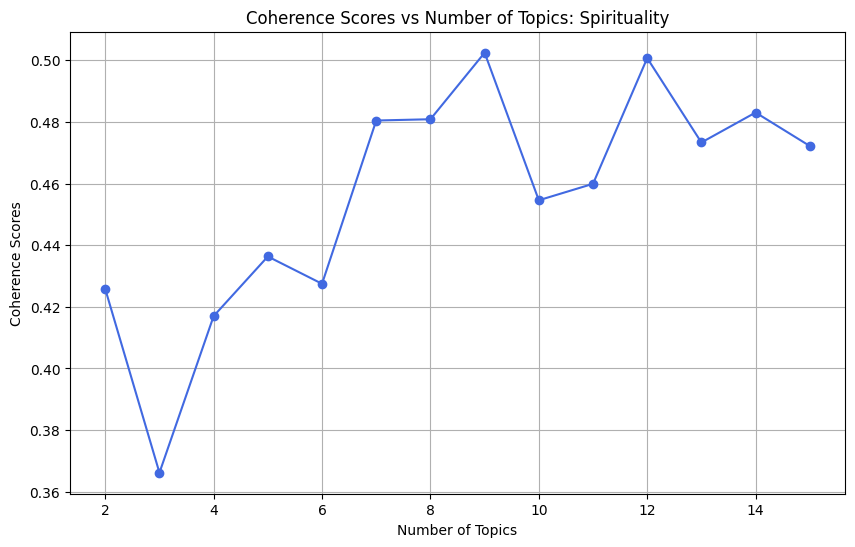

In [6]:
df_coherence = pd.read_csv("./coherence/coherence_spirituality.csv")

# Extracting data from the DataFrame
num_topics = df_coherence['Number of Topics']
coherence_scores = df_coherence['Coherence Scores']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(num_topics, coherence_scores, marker='o', linestyle='-', color='royalblue')
plt.title('Coherence Scores vs Number of Topics: Spirituality')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Scores')
plt.grid(True)

output_folder = os.path.join('coherence', 'coherence_png')
os.makedirs(output_folder, exist_ok=True)
output_path = os.path.join(output_folder, 'coherence_spirituality.png')
plt.savefig(output_path)

plt.show()

In [5]:
html_dir = 'visualizations'
os.makedirs(html_dir, exist_ok=True)

for num_topics in range(2, 16):
    model_file = f'models/lda_spirituality_{num_topics}_topics'
    lda_model_mallet = LdaMallet.load(model_file)
    
    # convert Mallet LDA model to Gensim LDA model
    lda_model_gensim = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(lda_model_mallet)
    vis_data = gensimvis.prepare(lda_model_gensim, doc_term_matrix, dictionary)
    
    # Save to HTML
    html_filename = os.path.join(html_dir, f'lda_spirituality_{num_topics}_topics.html')
    pyLDAvis.save_html(vis_data, html_filename)

/Users/shtosti/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shtosti/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shtosti/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shtosti/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shtosti/opt/anaconda3/lib/python3.9/site-packages/past/builti